No handles with labels found to put in legend.


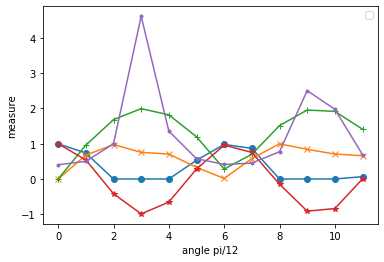

In [1]:
# various norms and distances graph
import math
import numpy as np
import matplotlib.pyplot as plt

def l1_norm(v):
    '''L1 distance'''
    norm = np.sum(v)
    return v / norm

def l2_norm(v):
    '''L2 distance'''
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

def froto(p, q):
    '''vector from p to q'''
    return np.array(p) - np.array(q)

def hellingm(p, q):
    '''returns Hellinger metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    hm = 0.
    for idx, elp in enumerate(p):
        hm += (math.sqrt(elp) - math.sqrt(max(q[idx], 0.)))**2
    return math.sqrt(hm) / math.sqrt(2.)

def euclid(p, q):
    '''Euclidean metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    ec = 0.
    for idx, elp in enumerate(p):
        ec += (elp - q[idx]) ** 2
    return math.sqrt(ec) 

def minkovfr(p, q, pp):
    '''Minkowski and fractional metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    ec = 0.
    for idx, elp in enumerate(p):
        ec += (elp - q[idx]) ** pp
    return ec ** (1. / pp)

def cosine(p, q):
    '''cosine similarity for distributions p and q'''
    if len(p) != len(q):
        return -1
    cs = 0.
    pn = 0.
    qn = 0.
    for idx, elp in enumerate(p):
        cs += elp * q[idx]
        pn += elp * elp
        qn += q[idx] * q[idx]
    if cs > 0. and pn > 0. and qn > 0.:
        return math.sqrt(cs) / math.sqrt(pn) / math.sqrt(qn)
    return 0

def jaccind(a, b):
    '''returns the Jaccard index for two sets a, b'''
    return len(a.intersection(b)) / len(a.union(b))

def kullei(p, q):
    '''Kullback-Leibler divergence (modified)'''
    return np.sum(np.dot(p, np.array([np.log(p / (q0 + 1) + 1) for q0 in q])))

def main():
    vx = np.array([1., 0.])
    xc = range(12)
    yc = []
    yh = []
    ye = []
    yd = []
    ykl = []
    for phi in range(0,12):
        vy = np.array([math.cos(phi), math.sin(phi)])
        yc.append(cosine(vx, vy))
        yh.append(hellingm(vx, vy))
        ye.append(euclid(vx, vy))
        yd.append(np.dot(vx, vy))
        ykl.append(kullei(vx, vy))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set(xlabel='angle pi/12', ylabel='measure')
    plt.plot(xc, yc, marker='o') # Cosine
    plt.plot(xc, yh, marker='x') # Helling
    plt.plot(xc, ye, marker='+') # Euclid
    plt.plot(xc, yd, marker='*') # dot
    plt.plot(xc, ykl, marker='.') # KL
    ax.legend(loc='best')
    plt.show()
    
if __name__=='__main__':
    main()

In [2]:
# Auri examples
import random

def dist():
    dfact = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
    dnms = ['km', '100m', '10m', 'm', 'dm', 'cm', 'mm']
    i0 = random.randint(0, len(dfact)-1)
    i1 = random.randint(0, len(dfact)-1)
    n0 = round(random.randint(5, 100) / random.randint(1, 20), 2)
    return (n0, dnms[i0], round(n0 * dfact[i0] / dfact[i1], 4), dnms[i1])

def area():
    dfact = [1000000, 10000, 100, 1, 0.01, 0.0001, 0.000001]
    dnms = ['km2', 'ha', 'a', 'm2', 'dm2', 'cm2', 'mm2']
    i0 = random.randint(0, len(dfact)-1)
    i1 = random.randint(0, len(dfact)-1)
    n0 = round(random.randint(5, 100) / random.randint(1, 20), 2)
    return (n0, dnms[i0], round(n0 * dfact[i0] / dfact[i1], 6), dnms[i1])

def vol():
    dfact = [1000000000, 1000000, 1000, 1, 0.001, 0.000001, 0.000000001]
    dnms = ['km3', '1000000m3', '1000m3', 'm3', 'dm3', 'cm3', 'mm3']
    i0 = random.randint(0, len(dfact)-1)
    i1 = random.randint(0, len(dfact)-1)
    n0 = round(random.randint(5, 100) / random.randint(1, 20), 2)
    return (n0, dnms[i0], round(n0 * dfact[i0] / dfact[i1], 8), dnms[i1])

def main():
    for i in range(10):
        print(dist())
    print()
    for i in range(10):
        print(area())
    print()
    for i in range(10):
        print(vol())

if __name__=='__main__':
    main()

(4.5, 'm', 0.45, '10m')
(13.2, '100m', 13200.0, 'dm')
(12.2, 'm', 1220.0, 'cm')
(3.06, 'cm', 30.6, 'mm')
(7.0, 'm', 700.0, 'cm')
(5.0, 'm', 0.5, '10m')
(7.44, 'm', 744.0, 'cm')
(1.38, 'mm', 0.0001, '10m')
(7.17, 'dm', 71.7, 'cm')
(1.5, 'dm', 0.0002, 'km')

(9.33, 'dm2', 0.0933, 'm2')
(13.29, 'dm2', 13.29, 'dm2')
(4.61, 'ha', 4.61, 'ha')
(38.5, 'cm2', 0.00385, 'm2')
(4.31, 'ha', 0.0431, 'km2')
(30.0, 'km2', 3000000000.0, 'dm2')
(6.56, 'a', 6560000.0, 'cm2')
(2.0, 'ha', 200000000.0, 'cm2')
(16.67, 'a', 16.67, 'a')
(30.0, 'a', 30000000.0, 'cm2')

(1.56, '1000000m3', 1560.0, '1000m3')
(4.25, '1000m3', 0.00425, '1000000m3')
(10.8, 'mm3', 0.0, 'km3')
(6.43, '1000m3', 6430000.0, 'dm3')
(2.8, 'm3', 0.0028, '1000m3')
(5.11, 'km3', 5110000000000.0, 'dm3')
(2.8, 'km3', 2800000000.0, 'm3')
(3.45, 'm3', 3450000.0, 'cm3')
(22.0, '1000000m3', 2.2e+16, 'mm3')
(1.53, '1000000m3', 1.53, '1000000m3')


In [3]:
# test q,k,v-attention
import numpy as np

def softmax(x):
    """compute softmax values for each sets of scores in x"""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def main():
    q = np.array([[0.1, 0.2, 0.2]])
    k = np.array([[0.1, 0, 0.3], [0.1, 0.2, 0], [0, 0.2, 0.3]])
    v = np.array([[1., 0., 1.]])
    print(k)
    print(np.dot(q, k.T))
    print(softmax(np.dot(q, k.T)) * v)

if __name__=='__main__':
    main()

[[0.1 0.  0.3]
 [0.1 0.2 0. ]
 [0.  0.2 0.3]]
[[0.07 0.05 0.1 ]]
[[1. 0. 1.]]


In [4]:
# text entropy 2
import math
import re
from collections import Counter

def entropy(s):
    '''calclate information entropy of given text'''
    p, lns = Counter(s), float(len(s)) # Counter({'4': 4, '3': 3, '2': 2, '1': 1})
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())
        
def main():
    piece = input("Enter text: ").replace('\n', ' ').replace('\r', ' ')
    print('++++++++++++++++++++++++++++++++++++++')
    #print(uniqc(piece))
    print(entropy(piece))

if __name__=='__main__':
    main()

Enter text: this is a test
++++++++++++++++++++++++++++++++++++++
2.6455933144511468


In [5]:
# Markov chain text generator
import sys
import random
 
def readdata(file):
    '''Read file and return contents.'''
    with open(file) as f:
        contents = f.read()
    return contents
 
def makerule(data, context):
    '''Make a rule dict for given data.'''
    rule = {}
    words = data.split(' ')
    index = context
 
    for word in words[index:]:
        key = ' '.join(words[index-context:index])
        if key in rule:
            rule[key].append(word)
        else:
            rule[key] = [word]
        index += 1
 
    return rule
 
def makestring(rule, length):    
    '''Use a given rule to make a string.'''
    oldwords = random.choice(list(rule.keys())).split(' ') #random starting words
    string = ' '.join(oldwords) + ' '
 
    for i in range(length):
        try:
            key = ' '.join(oldwords)
            newword = random.choice(rule[key])
            string += newword + ' '
 
            for word in range(len(oldwords)):
                oldwords[word] = oldwords[(word + 1) % len(oldwords)]
            oldwords[-1] = newword
 
        except KeyError:
            return string
    return string
 
if __name__ == '__main__':
    # Usage: markov.py source.txt context length
    #data = readdata(sys.argv[1])
    data = '''As soon as they heard her orders they ran away in every direction as fast as they could, Dorothy
only stopping once to pick a beautiful flower; and after a time the ladder was ready. The Scarecrow
climbed up the ladder first, but he was so anxious to get the new house and my wife as soon as
possible. The Lion hesitated no longer, but drank till the dish was empty. How do you do? I'm pretty
well, thank you, replied Dorothy politely. How do you do? I'm not feeling well, said the wolf, and
he dashed away at full speed, followed by the others. It was lucky the Scarecrow and the Tin
Woodman, for we certainly must climb over the wall. When they were on, Dorothy could not take them
off had she wished, but of course she did not wish to leave her little dog behind. Toto had run into
the crowd to bark at the birds sitting there. Dorothy went to the Witch's castle, where he was
placed in a small yard with a high arched room, the walls of which glistened with countless
emeralds. Before them stood a little man about the same height as herself; and when she had made out
the proper way of nursing it, (which was to twist it up into a sort of lullaby to it as she did not
notice when the Scarecrow stumbled into a hole and rolled over to the other side of the Tin Woodman,
sadly; for he is much too heavy to carry I shall have to think about that, replied the little old
woman as her only friend. No, I cannot do that, she replied, but I will give you some supper and a
place to pass the night with you, if you will only hold fast to the tip of my tail.'''
    #rule = makerule(data, int(sys.argv[2]))
    #string = makestring(rule, int(sys.argv[3]))
    rule = makerule(data, 10)
    string = makestring(rule, 50)
    print(string)

replied the little old
woman as her only friend. No, I cannot do that, she replied, but I will give you some supper and a
place to pass the night with you, if you will only hold fast to the tip of my tail. 


In [6]:
# search test time constraints on google
# googlesearch.search(query, tld='com', lang='en', tbs='0',
# safe='off', num=10, start=0, stop=None, domains=None, pause=2.0,
# tpe='', country='', extra_params=None, user_agent=None)[source]
# tbs (str) – Time limits (i.e “qdr:h” => last hour, “qdr:d” => last 24 hours, “qdr:m” => last month)
# A specific time range, for example from March 2 1984 to June 5 1987: tbs=cdr:1,cd_min:3/2/1984,cd_max:6/5/1987
# extra_params (dict) – A dictionary of extra HTTP GET parameters,
# which must be URL encoded. For example if you don’t want Google to filter similar
# results you can set the extra_params to {‘filter’: ‘0’} which will append ‘&filter=0’ to every query.
try: 
    from googlesearch import search 
except ImportError:  
    print("No module named 'google' found") 
  
# to search 
query = "covid-19"
  
#for j in search(query, tld="co.in", num=5, stop=5, pause=1):
#for j in search(query, tld="co.in", tbs='cdr:2Ccd_min:2F30%2F2020:Ccd_max:2F11%2F2020', num=5, stop=5, pause=2):
for j in search(query, tld="co.in", tbs='cdr:1,cd_min:3/1/2020,cd_max:3/20/2020', num=5, stop=5, pause=2): 
    print(j)

https://www.derstandard.at/story/2000115810293/aktuelle-zahlen-zum-coronavirus
https://www.sozialministerium.at/
https://www.ages.at/themen/krankheitserreger/coronavirus/
https://www.who.int/emergencies/diseases/novel-coronavirus-2019/advice-for-public
https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic


In [7]:
# Install the h5py package if it isn't installed yet with running in your command line interface
# sudo pip install h5py

# https://github.com/totalgood/nlpia/tree/master/src/nlpia/book/examples

In [9]:
# code is adopted to Francois Chollet's example: https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html

from keras.models import Model
from keras.layers import Input, LSTM, Dense


def instantiate_seq2seq_model(num_encoder_tokens, num_decoder_tokens, num_neurons=256):

    encoder_inputs = Input(shape=(None, num_encoder_tokens))
    encoder = LSTM(num_neurons, return_state=True)
    _, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]

    decoder_inputs = Input(shape=(None, num_decoder_tokens))
    decoder_lstm = LSTM(num_neurons, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                         initial_state=encoder_states)
    decoder_dense = Dense(num_decoder_tokens, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)

    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    encoder_model = Model(encoder_inputs, encoder_states)

    decoder_state_input_h = Input(shape=(num_neurons,))
    decoder_state_input_c = Input(shape=(num_neurons,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(
        decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model(
        [decoder_inputs] + decoder_states_inputs,
        [decoder_outputs] + decoder_states)

    return model, encoder_model, decoder_model


def construct_seq2seq_model(num_encoder_tokens, num_decoder_tokens, num_neurons=256):

    encoder_inputs = Input(shape=(None, num_encoder_tokens))
    encoder = LSTM(num_neurons, return_state=True)
    _, state_h, state_c = encoder(encoder_inputs)

    encoder_states = [state_h, state_c]

    decoder_inputs = Input(shape=(None, num_decoder_tokens))
    decoder_lstm = LSTM(num_neurons, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                         initial_state=encoder_states)
    decoder_dense = Dense(num_decoder_tokens, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)

    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    return model

Using TensorFlow backend.


In [10]:
import numpy as np
#from ch10 import instantiate_seq2seq_model

In [12]:
from __future__ import print_function, unicode_literals, division, absolute_import
from builtins import (bytes, dict, int, list, object, range, str,  # noqa
    ascii, chr, hex, input, next, oct, open, pow, round, super, filter, map, zip)
from future import standard_library
standard_library.install_aliases()  # noqa
from past.builtins import basestring

# from traceback import format_exc
import os
import re
import json
import logging
import shutil
from traceback import format_exc
from zipfile import ZipFile
from math import ceil
from itertools import product, zip_longest
from requests.exceptions import ConnectionError, InvalidURL, InvalidSchema, InvalidHeader, MissingSchema
from urllib.error import URLError
from copy import deepcopy

import pandas as pd
import tarfile
import ftplib
import spacy
from gensim.models import KeyedVectors
from gensim.models.keyedvectors import REAL, Vocab
from gensim.scripts.glove2word2vec import glove2word2vec
from pugnlp.util import clean_columns

from nlpia.constants import DATA_PATH, BIGDATA_PATH
from nlpia.constants import DATA_INFO_FILE, BIGDATA_INFO_FILE, BIGDATA_INFO_LATEST
from nlpia.constants import INT_MIN, INT_NAN, MIN_DATA_FILE_SIZE
from nlpia.constants import EOL  # noqa (not used)
from nlpia.constants import tqdm, no_tqdm
from nlpia.futil import mkdir_p, path_status, find_files  # from pugnlp.futil
from nlpia.futil import find_filepath, expand_filepath, normalize_filepath, normalize_ext, ensure_open
from nlpia.futil import read_json, read_text, read_csv
from nlpia.web import get_url_filemeta
from nlpia.web import dropbox_basename, get_url_title, try_parse_url  # noqa (not used)
from nlpia.web import requests_get


_parse = None  # placeholder for SpaCy parser + language model

np = pd.np

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
# logging.config.dictConfig(LOGGING_CONFIG)
# # doesn't display line number, etc
# if os.environ.get('DEBUG'):
#     logging.basicConfig(level=logging.DEBUG)


# SMALLDATA_URL = 'http://totalgood.org/static/data'

W2V_FILES = [
    'GoogleNews-vectors-negative300.bin.gz',
    'glove.6B.zip', 'glove.twitter.27B.zip', 'glove.42B.300d.zip', 'glove.840B.300d.zip',
]
# You probably want to `rm nlpia/src/nlpia/data/bigdata_info.csv` if you modify any of these
# so they don't overwrite what you hardcode within loaders.py here:
ZIP_FILES = {
    'GoogleNews-vectors-negative300.bin.gz': None,
    'glove.6B.zip': ['glove.6B.50d.w2v.txt', 'glove.6B.100d.w2v.txt', 'glove.6B.200d.w2v.txt', 'glove.6B.300d.w2v.txt'],
    'glove.twitter.27B.zip': None,
    'glove.42B.300d.zip': None,
    'glove.840B.300d.zip': None,
}
ZIP_PATHS = [[os.path.join(BIGDATA_PATH, fn) for fn in ZIP_FILES[k]] if ZIP_FILES[k] else k for k in ZIP_FILES.keys()]

harry_docs = ["The faster Harry got to the store, the faster and faster Harry would get home.",
              "Harry is hairy and faster than Jill.",
              "Jill is not as hairy as Harry."]


def load_imdb_df(dirpath=os.path.join(BIGDATA_PATH, 'aclImdb'), subdirectories=(('train', 'test'), ('pos', 'neg', 'unsup'))):
    """ Walk directory tree starting at `path` to compile a DataFrame of movie review text labeled with their 1-10 star ratings
    Returns:
      DataFrame: columns=['url', 'rating', 'text'], index=MultiIndex(['train_test', 'pos_neg_unsup', 'id'])
    TODO:
      Make this more robust/general by allowing the subdirectories to be None and find all the subdirs containing txt files
    >> imdb_df().head()
                                                          url  rating                                               text
    index0 index1 index2
    train  pos    0       http://www.imdb.com/title/tt0453418       9  Bromwell High is a cartoon comedy. It ran at t...
                  1       http://www.imdb.com/title/tt0210075       7  If you like adult comedy cartoons, like South ...
                  2       http://www.imdb.com/title/tt0085688       9  Bromwell High is nothing short of brilliant. E...
                  3       http://www.imdb.com/title/tt0033022      10  "All the world's a stage and its people actors...
                  4       http://www.imdb.com/title/tt0043137       8  FUTZ is the only show preserved from the exper...
    """
    dfs = {}
    for subdirs in tqdm(list(product(*subdirectories))):
        urlspath = os.path.join(dirpath, subdirs[0], 'urls_{}.txt'.format(subdirs[1]))
        if not os.path.isfile(urlspath):
            if subdirs != ('test', 'unsup'):  # test/ dir doesn't usually have an unsup subdirectory
                logger.warning('Unable to find expected IMDB review list of URLs: {}'.format(urlspath))
            continue
        df = pd.read_csv(urlspath, header=None, names=['url'])
        # df.index.name = 'id'
        df['url'] = series_strip(df.url, endswith='/usercomments')

        textsdir = os.path.join(dirpath, subdirs[0], subdirs[1])
        if not os.path.isdir(textsdir):
            logger.warning('Unable to find expected IMDB review text subdirectory: {}'.format(textsdir))
            continue
        filenames = [fn for fn in os.listdir(textsdir) if fn.lower().endswith('.txt')]
        df['index0'] = subdirs[0]  # TODO: column names more generic so will work on other datasets
        df['index1'] = subdirs[1]
        df['index2'] = np.array([int(fn[:-4].split('_')[0]) for fn in filenames])
        df['rating'] = np.array([int(fn[:-4].split('_')[1]) for fn in filenames])
        texts = []
        for fn in filenames:
            with ensure_open(os.path.join(textsdir, fn)) as f:
                texts.append(f.read())
        df['text'] = np.array(texts)
        del texts
        df.set_index('index0 index1 index2'.split(), inplace=True)
        df.sort_index(inplace=True)
        dfs[subdirs] = df
    return pd.concat(dfs.values())


def load_glove(filepath, batch_size=1000, limit=None, verbose=True):
    r""" Load a pretrained GloVE word vector model
    First header line of GloVE text file should look like:
        400000 50\n
    First vector of GloVE text file should look like:
        the .12 .22 .32 .42 ... .42
    >>> wv = load_glove(os.path.join(BIGDATA_PATH, 'glove_test.txt'))
    >>> wv.most_similar('and')[:3]
    [(',', 0.92...),
     ('.', 0.91...),
     ('of', 0.86...)]
    """
    num_dim = isglove(filepath)
    tqdm_prog = tqdm if verbose else no_tqdm
    wv = KeyedVectors(num_dim)

    if limit:
        vocab_size = int(limit)
    else:
        with ensure_open(filepath) as fin:
            for i, line in enumerate(fin):
                pass
        vocab_size = i + 1

    wv.vectors = np.zeros((vocab_size, num_dim), REAL)

    with ensure_open(filepath) as fin:
        batch, words = [], []
        for i, line in enumerate(tqdm_prog(fin, total=vocab_size)):
            line = line.split()
            word = line[0]
            vector = np.array(line[1:]).astype(float)
            # words.append(word)
            # batch.append(vector)
            wv.index2word.append(word)
            wv.vocab[word] = Vocab(index=i, count=vocab_size - i)
            wv.vectors[i] = vector
            if len(words) >= batch_size:
                # wv[words] = np.array(batch)
                batch, words = [], []
            if i >= vocab_size - 1:
                break
        if words:
            wv[words] = np.array(batch)
    return wv


def load_glove_df(filepath, **kwargs):
    """ Load a GloVE-format text file into a dataframe
    >>> df = load_glove_df(os.path.join(BIGDATA_PATH, 'glove_test.txt'))
    >>> df.index[:3]
    Index(['the', ',', '.'], dtype='object', name=0)
    >>> df.iloc[0][:3]
    1    0.41800
    2    0.24968
    3   -0.41242
    Name: the, dtype: float64
    """
    pdkwargs = dict(index_col=0, header=None, sep=r'\s', skiprows=[0], verbose=False, engine='python')
    pdkwargs.update(kwargs)
    return pd.read_csv(filepath, **pdkwargs)


# def load_glove_format(filepath):
#     """ https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python#45894001 """
#     # glove_input_file = os.path.join(BIGDATA_PATH, filepath)
#     word2vec_output_file = os.path.join(BIGDATA_PATH, filepath.split(os.path.sep)[-1][:-4] + '.w2v.txt')
#     if not os.path.isfile(word2vec_output_file):  # TODO: also check file size
#         glove2word2vec(glove_input_file=filepath, word2vec_output_file=word2vec_output_file)
#     return KeyedVectors.load_word2vec_format(word2vec_output_file)


def get_en2fr(url='http://www.manythings.org/anki/fra-eng.zip'):
    """ Download and parse English->French translation dataset used in Keras seq2seq example """
    download_unzip(url)
    return pd.read_table(url, compression='zip', header=None, skip_blank_lines=True, sep='\t', skiprows=0, names='en fr'.split())


def load_anki_df(language='deu'):
    """ Load into a DataFrame statements in one language along with their translation into English
    >>> df = get_data('zsm')
    >>> list(list(df.columns)[:2])
    ['eng', 'zsm']
    >>> len(df) > 100
    True
    >> get_data('zsm').head(2)
                    eng                                zsm
    0      Are you new?                         Awak baru?
    1        Forget it.                        Lupakanlah.
    """
    if os.path.isfile(language):
        filepath = language
        lang = re.search('[a-z]{3}-eng/', filepath).group()[:3].lower()
    else:
        lang = (language or 'deu').lower()[:3]
        filepath = os.path.join(BIGDATA_PATH, '{}-eng'.format(lang), '{}.txt'.format(lang))
    df = pd.read_table(filepath, skiprows=1, header=None)
    for i, newc in enumerate(['eng', lang, 'license']):
        df.columns = [newc if str(c).lower().strip().startswith(newc) else c for c in df.columns]
        if newc not in df.columns and i < len(df.columns):
            columns = list(df.columns)
            columns[i] = newc
            df.columns = columns
    return df


BIG_URLS = {
    'w2v': (
        'https://www.dropbox.com/s/965dir4dje0hfi4/GoogleNews-vectors-negative300.bin.gz?dl=1',
        1647046227,
        'GoogleNews-vectors-negative300.bin.gz',
        KeyedVectors.load_word2vec_format,
        {'binary': True},
    ),
    'words_google_news': (
        'https://www.dropbox.com/s/9pm0js9qdjr04jy/words_google_news.txt.gz?dl=1',
        3015517,
    ),
    'glove_twitter': (
        'https://nlp.stanford.edu/data/glove.twitter.27B.zip',
        1520408563,
    ),
    'glove_small': (
        'https://nlp.stanford.edu/data/glove.6B.zip',
        862182613,
        os.path.join('glove.6B', 'glove.6B.50d.txt'),
        load_glove,
    ),
    'glove_large': (
        'https://nlp.stanford.edu/data/glove.840B.300d.zip',
        2176768927,
    ),
    'glove_medium': (
        'https://nlp.stanford.edu/data/glove.42B.300d.zip',
        1877800501,
    ),
    'slang': (
        'https://www.dropbox.com/s/43c22018fbfzypd/slang.csv.gz?dl=1',
        117633024,
    ),
    'tweets': (
        'https://www.dropbox.com/s/5gpb43c494mc8p0/tweets.csv.gz?dl=1',
        311725313,
    ),
    'crimedata': (
        'https://www.dropbox.com/s/mg4yokpifu3n6u5/crimedata.csv.gz?dl=1',
        2126689,
    ),
    'cities': (
        'https://www.dropbox.com/s/tcri5eyzpabhnyy/cities.csv.gz?dl=1',
        8396891,
    ),
    'cities_us_wordvectors': (
        'https://www.dropbox.com/s/7ujezmo03b637q3/cities_us_wordvectors.csv.gz?dl=1',
        8451128,
    ),
    'dialog': (
        'https://www.dropbox.com/s/5543bkihxflzry9/dialog.csv.gz?dl=1',
        4415234,
    ),
    'cornellmovies': (
        'http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip',
        9916637,
        'cornell_movie_dialogs_corpus',

    ),
    'save_dialog_tweets': (
        'https://www.dropbox.com/s/tlrr9bm45uzm9yl/save_dialog_tweets.txt.gz?dl=1',
        4517000,
    ),
    'lsa_tweets': (
        'https://www.dropbox.com/s/rpjt0d060t4n1mr/lsa_tweets_5589798_2003588x200.tar.gz?dl=1',
        3112841563,
    ),
    'lsa_tweets_pickle': (
        'https://www.dropbox.com/s/7k0nvl2dx3hsbqp/lsa_tweets_5589798_2003588x200.pkl.projection.u.npy?dl=1',
        2900000000,
    ),
    'ubuntu_dialog_1500k': (
        'https://www.dropbox.com/s/krvi79fbsryytc2/ubuntu_dialog_1500k.csv.gz?dl=1',
        296098788,
    ),
    'ubuntu_dialog_test': (
        'https://www.dropbox.com/s/47mqbx0vgynvnnj/ubuntu_dialog_test.csv.gz?dl=1',
        31273,
    ),
    'imdb': (
        'https://www.dropbox.com/s/yviic64qv84x73j/aclImdb_v1.tar.gz?dl=1',
        84125825,
        'aclImdb',  # directory for extractall
        load_imdb_df,  # postprocessor to combine text files into a single DataFrame
    ),
    'imdb_test': (
        'https://www.dropbox.com/s/cpgrf3udzkbmvuu/aclImdb_test.tar.gz?dl=1',
        10858,
        'aclImdb_test',  # directory for extractall
        load_imdb_df,
    ),
    'alice': (
        # 'https://www.dropbox.com/s/py952zad3mntyvp/aiml-en-us-foundation-alice.v1-9.zip?dl=1',
        'https://storage.googleapis.com/google-code-archive-downloads/v2/code.google.com/' \
        'aiml-en-us-foundation-alice/aiml-en-us-foundation-alice.v1-9.zip',
        8249482,
    ),
    # BRFSS annual mental health survey
    'cdc': (
        'https://www.cdc.gov/brfss/annual_data/2016/files/LLCP2016ASC.zip',
        52284490,
    ),
}
for yr in range(2011, 2017):
    BIG_URLS['cdc' + str(yr)[-2:]] = ('https://www.cdc.gov/brfss/annual_data/{yr}/files/LLCP{yr}ASC.zip'.format(yr=yr), None)


# Aliases for bigurls. Canonical name given on line by itself.
BIG_URLS['cornell'] = BIG_URLS['cornellmoviedialog'] = BIG_URLS['cornellmoviedialogs'] = BIG_URLS['cornell_movie_dialog'] = \
    BIG_URLS['cornell_movie_dialogs'] = BIG_URLS['cornell_movie_dialog_corpus'] = BIG_URLS['cornell_movie_dialogs_corpus'] = \
    BIG_URLS['cornellmovies']
BIG_URLS['word2vec'] = BIG_URLS['wv'] = \
    BIG_URLS['w2v']
BIG_URLS['glove'] = BIG_URLS['glovesm'] = BIG_URLS['glove-sm'] = BIG_URLS['glove_sm'] = BIG_URLS['glove-small'] = \
    BIG_URLS['glove_small']
BIG_URLS['ubuntu'] = BIG_URLS['ubuntu_dialog'] = \
    BIG_URLS['ubuntu_dialog_1500k']
BIG_URLS['glovelg'] = BIG_URLS['glove_lg'] = BIG_URLS['glove-lg'] = BIG_URLS['glove-large'] = \
    BIG_URLS['glove_large']
BIG_URLS['glovemed'] = BIG_URLS['glove_med'] = BIG_URLS['glove-med'] = BIG_URLS['glove-medium'] = \
    BIG_URLS['glove_medium']


def generate_big_urls_glove(bigurls=None):
    """ Generate a dictionary of URLs for various combinations of GloVe training set sizes and dimensionality """
    bigurls = bigurls or {}
    for num_dim in (50, 100, 200, 300):
        # not all of these dimensionality, and training set size combinations were trained by Stanford
        for suffixes, num_words in zip(
                ('sm -sm _sm -small _small'.split(),
                 'med -med _med -medium _medium'.split(),
                 'lg -lg _lg -large _large'.split()),
                (6, 42, 840)
        ):
            for suf in suffixes[:-1]:
                name = 'glove' + suf + str(num_dim)
                dirname = 'glove.{num_words}B'.format(num_words=num_words)
                # glove.42B.300d.w2v.txt
                filename = dirname + '.{num_dim}d.w2v.txt'.format(num_dim=num_dim)
                # seed the alias named URL with the URL for that training set size's canonical name
                bigurl_tuple = BIG_URLS['glove' + suffixes[-1]]
                bigurls[name] = list(bigurl_tuple[:2])
                bigurls[name].append(os.path.join(dirname, filename))
                bigurls[name].append(load_glove)
                bigurls[name] = tuple(bigurls[name])
    return bigurls


BIG_URLS.update(generate_big_urls_glove())

ANKI_LANGUAGES = 'afr arq ara aze eus bel ben ber bul yue cat cbk cmn chv hrv ces dan nld est fin fra glg kat ' \
                 'deu ell heb hin hun isl ind ita jpn kha khm kor lvs lit nds mkd zsm mal mri mar max nob pes ' \
                 'pol por ron rus srp slk slv spa swe tgl tam tat tha tur ukr urd uig vie'.split()
ANKI_LANGUAGE_SYNONYMS = list(zip('fre esp ger french spanish german turkish turkey dut dutch'.split(),
                                  'fra spa deu fra    spa     deu    tur     tur    dan dan'.split()))
LANG2ANKI = dict((lang[:2], lang) for lang in ANKI_LANGUAGES)
"""
>>> len(ANKI_LANGUAGES) - len(LANG2ANKI)
9
"""
ENGLISHES = 'eng usa us bri british american aus australian'.split()
for lang in ANKI_LANGUAGES:
    for eng in ENGLISHES:
        BIG_URLS[lang] = ('http://www.manythings.org/anki/{}-eng.zip'.format(lang), 1000, '{}-{}'.format(lang, eng), load_anki_df)
        BIG_URLS[lang + '-eng'] = ('http://www.manythings.org/anki/{}-eng.zip'.format(lang),
                                   1000, '{}-{}'.format(lang, eng), load_anki_df)

for syn, lang in ANKI_LANGUAGE_SYNONYMS:
    BIG_URLS[syn] = BIG_URLS[lang]
    for eng in ENGLISHES:
        BIG_URLS[lang + '-' + eng] = BIG_URLS[lang + '-eng']


"""
Google N-Gram Viewer meta data is from:
* [GOOGLE_NGRAM files](https://storage.googleapis.com/books/ngrams/books/datasetsv2.html)
* [GOOGLE_NGRAM data format](https://books.google.com/ngrams/info)
"""
GOOGLE_NGRAM_URL = 'http://storage.googleapis.com/books/ngrams/books/'
GOOGLE_NGRAM_NAMES = '0 1 2 3 4 5 6 7 8 9 a b c d e f g h i j k l m n o other p pos punctuation q r s t u v w x y z'.split()
GOOGLE_NGRAM_FILE = 'googlebooks-eng-all-1gram-20120701-{}.gz'

for name in GOOGLE_NGRAM_NAMES:
    BIG_URLS['1gram_{}'.format(name)] = (GOOGLE_NGRAM_URL + GOOGLE_NGRAM_FILE.format(name),
                                         1000, GOOGLE_NGRAM_FILE.format(name),
                                         pd.read_table,
                                         {'sep': '\t', 'header': None, 'names': 'term_pos year term_freq book_freq'.split()})

try:
    BIGDATA_INFO = pd.read_csv(BIGDATA_INFO_FILE, header=0)
    logger.warning('Found BIGDATA index in {default} so it will overwrite nlpia.loaders.BIG_URLS !!!'.format(
        default=BIGDATA_INFO_FILE))
except (IOError, pd.errors.EmptyDataError):
    BIGDATA_INFO = pd.DataFrame(columns='name url file_size'.split())
    logger.info('No BIGDATA index found in {default} so copy {latest} to {default} if you want to "freeze" it.'.format(
        default=BIGDATA_INFO_FILE, latest=BIGDATA_INFO_LATEST))
BIG_URLS.update(dict(zip(BIGDATA_INFO.name, zip(BIGDATA_INFO.url, BIGDATA_INFO.file_size))))
BIGDATA_INFO = pd.DataFrame(list(
    zip(BIG_URLS.keys(), list(zip(*BIG_URLS.values()))[0], list(zip(*BIG_URLS.values()))[1])),
    columns='name url file_size'.split())
BIGDATA_INFO.to_csv(BIGDATA_INFO_LATEST)


# FIXME: consolidate with DATA_INFO or BIG_URLS
DATA_NAMES = {
    'pointcloud': os.path.join(DATA_PATH, 'pointcloud.csv.gz'),
    'hutto_tweets0': os.path.join(DATA_PATH, 'hutto_ICWSM_2014/tweets_GroundTruth.csv.gz'),
    'hutto_tweets': os.path.join(DATA_PATH, 'hutto_ICWSM_2014/tweets_GroundTruth.csv'),
    'hutto_nyt': os.path.join(DATA_PATH, 'hutto_ICWSM_2014/nytEditorialSnippets_GroundTruth.csv.gz'),
    'hutto_movies': os.path.join(DATA_PATH, 'hutto_ICWSM_2014/movieReviewSnippets_GroundTruth.csv.gz'),
    'hutto_products': os.path.join(DATA_PATH, 'hutto_ICWSM_2014/amazonReviewSnippets_GroundTruth.csv.gz'),
}

# FIXME: put these in BIG_URLS, and test/use them with get_data()
DDL_DS_QUESTIONS_URL = 'http://minimum-entropy.districtdatalabs.com/api/questions/?format=json'
DDL_DS_ANSWERS_URL = 'http://minimum-entropy.districtdatalabs.com/api/answers/?format=json'


# Files to load into local variables like loaders.kite_text loaders.kite_history
TEXTS = ['kite_text.txt', 'kite_history.txt']
CSVS = ['mavis-batey-greetings.csv', 'sms-spam.csv']

DATA_INFO = pd.read_csv(DATA_INFO_FILE, header=0)


def rename_file(source, dest):
    """ Rename (mv) file(s) from source to dest
    >>> from tempfile import mkdtemp
    >>> tmpdir = mkdtemp(suffix='doctest_rename_file', prefix='tmp')
    >>> fout = ensure_open(os.path.join(tmpdir, 'fake_data.bin.gz'), 'w')
    >>> fout.write(b'fake nlpia.loaders.rename_file')
    30
    >>> fout.close()
    >>> dest = rename_file(os.path.join(tmpdir, 'fake_data.bin.gz'), os.path.join(tmpdir, 'Fake_Data.bin.gz'))
    >>> os.path.isfile(os.path.join(tmpdir, 'Fake_Data.bin.gz'))
    True
    """
    logger.debug('nlpia.loaders.rename_file(source={}, dest={})'.format(source, dest))
    if not isinstance(source, str):
        dest = [dest] if isinstance(dest, str) else dest
        return [rename_file(s, d) for (s, d) in zip_longest(source, dest, fillvalue=[source, dest][int(len(source) > len(dest))])]
    logger.debug('nlpia.loaders.os.rename(source={}, dest={})'.format(source, dest))
    if source == dest:
        return dest
    os.rename(source, dest)
    return dest


def normalize_ext_rename(filepath):
    """ normalize file ext like '.tgz' -> '.tar.gz' and '300d.txt' -> '300d.glove.txt' and rename the file
    >>> pth = os.path.join(DATA_PATH, 'sms_slang_dict.txt')
    >>> pth == normalize_ext_rename(pth)
    True
    """
    logger.warn('normalize_ext.filepath=' + str(filepath))
    new_file_path = normalize_ext(filepath)
    logger.warn('download_unzip.new_filepaths=' + str(new_file_path))
    # FIXME: fails when name is a url filename
    filepath = rename_file(filepath, new_file_path)
    logger.warn('download_unzip.filepath=' + str(filepath))
    return filepath


def untar(fname, verbose=True):
    """ Uunzip and untar a tar.gz file into a subdir of the BIGDATA_PATH directory """
    if fname.lower().endswith(".tar.gz"):
        dirpath = os.path.join(BIGDATA_PATH, os.path.basename(fname)[:-7])
        if os.path.isdir(dirpath):
            return dirpath
        with tarfile.open(fname) as tf:
            members = tf.getmembers()
            for member in tqdm(members, total=len(members)):
                tf.extract(member, path=BIGDATA_PATH)
        dirpath = os.path.join(BIGDATA_PATH, members[0].name)
        if os.path.isdir(dirpath):
            return dirpath
    else:
        logger.warning("Not a tar.gz file: {}".format(fname))


def series_rstrip(series, endswith='/usercomments', ignorecase=True):
    """ Strip a suffix str (`endswith` str) from a `df` columns or pd.Series of type str """
    return series_strip(series, startswith=None, endswith=endswith, startsorendswith=None, ignorecase=ignorecase)


def series_lstrip(series, startswith='http://', ignorecase=True):
    """ Strip a suffix str (`endswith` str) from a `df` columns or pd.Series of type str """
    return series_strip(series, startswith=startswith, endswith=None, startsorendswith=None, ignorecase=ignorecase)


def series_strip(series, startswith=None, endswith=None, startsorendswith=None, ignorecase=True):
    """ Strip a suffix/prefix str (`endswith`/`startswith` str) from a `df` columns or pd.Series of type str """
    if ignorecase:
        mask = series.str.lower()
        endswith = endswith.lower()
    else:
        mask = series
    if not (startsorendswith or endswith or startswith):
        logger.warning('In series_strip(): You must specify endswith, startswith, or startsorendswith string arguments.')
        return series
    if startsorendswith:
        startswith = endswith = startsorendswith
    if endswith:
        mask = mask.str.endswith(endswith)
        series[mask] = series[mask].str[:-len(endswith)]
    if startswith:
        mask = mask.str.endswith(startswith)
        series[mask] = series[mask].str[len(startswith):]
    return series


def endswith_strip(s, endswith='.txt', ignorecase=True):
    """ Strip a suffix from the end of a string
    >>> endswith_strip('http://TotalGood.com', '.COM')
    'http://TotalGood'
    >>> endswith_strip('http://TotalGood.com', endswith='.COM', ignorecase=False)
    'http://TotalGood.com'
    """
    if ignorecase:
        if s.lower().endswith(endswith.lower()):
            return s[:-len(endswith)]
    else:
        if s.endswith(endswith):
            return s[:-len(endswith)]
    return s


def startswith_strip(s, startswith='http://', ignorecase=True):
    """ Strip a prefix from the beginning of a string
    >>> startswith_strip('HTtp://TotalGood.com', 'HTTP://')
    'TotalGood.com'
    >>> startswith_strip('HTtp://TotalGood.com', startswith='HTTP://', ignorecase=False)
    'HTtp://TotalGood.com'
    """
    if ignorecase:
        if s.lower().startswith(startswith.lower()):
            return s[len(startswith):]
    else:
        if s.endswith(startswith):
            return s[len(startswith):]
    return s


def combine_dfs(dfs, index_col='index0 index1 index2'.split()):
    if isinstance(dfs, 'dict'):
        dfs = list(dfs.values())


def get_longest_table(url='https://www.openoffice.org/dev_docs/source/file_extensions.html', header=0):
    """ Retrieve the HTML tables from a URL and return the longest DataFrame found
    >>> get_longest_table('https://en.wikipedia.org/wiki/List_of_sovereign_states').columns
    Index(['Common and formal names', 'Membership within the UN System[a]',
       'Sovereignty dispute[b]',
       'Further information on status and recognition of sovereignty[d]'],
      dtype='object')
    """
    dfs = pd.read_html(url, header=header)
    return longest_table(dfs)


def get_leet_map():
    r""" Retrieve mapping from English letters to l33t like E => 3 or A => /\ or /-\ or @ """
    df = get_longest_table(
        'https://sites.google.com/site/inhainternetlanguage/different-internet-languages/l33t/list-of-l33ts', header=None)
    df = df.drop(index=0).iloc[:, :2]
    df.columns = ['eng', 'l33t']
    df['l33t'] = df['l33t'].str.split(',')
    table = []
    for i, row in df.iterrows():
        for s in row['l33t']:
            table.append((row['eng'].strip(), s.strip()))
    table = pd.DataFrame(table, columns=df.columns)
    leet_path = os.path.join(DATA_PATH, 'l33t.csv')
    logger.info('Saving l33t dictionary (character mapping) to {}'.format(leet_path))
    table.to_csv(leet_path)
    return table


def get_netspeak_map():
    """ Retrieve mapping from chat/text abbreviations and acronyms like LMK => Let Me Know """
    dfs = pd.read_html('https://www.webopedia.com/quick_ref/textmessageabbreviations.asp')
    df = dfs[0].drop(index=0)
    df.columns = ['abbrev', 'definition']
    csv_path = os.path.join(DATA_PATH, 'netspeak.csv')
    logger.info('Saving netspeak dictionary (word mapping) to {}'.format(csv_path))
    df.to_csv(csv_path)
    return df


# more nontabular lists at 'https://simple.wikipedia.org/wiki/Leet


def longest_table(dfs):
    """ Return this single longest DataFrame that among an array/list/tuple of DataFrames
    Useful for automagically finding the DataFrame you want when using pd.read_html() on a Wikipedia page.
    """
    sorted_indices = sorted((len(df if hasattr(df, '__len__') else []), i) for i, df in enumerate(dfs))
    return dfs[sorted_indices[-1][1]]


def get_filename_extensions(url='https://www.webopedia.com/quick_ref/fileextensionsfull.asp'):
    """ Load a DataFrame of filename extensions from the indicated url
    >>> df = get_filename_extensions('https://www.openoffice.org/dev_docs/source/file_extensions.html')
    >>> df.head(2)
        ext                      description
    0    .a        UNIX static library file.
    1  .asm  Non-UNIX assembler source file.
    """
    df = get_longest_table(url)
    columns = list(df.columns)
    columns[0] = 'ext'
    columns[1] = 'description'
    if len(columns) > 2:
        columns[2] = 'details'
    df.columns = columns
    return df


#######################################################################
# Populate some local string variables with text files from DATA_PATH
for filename in TEXTS:
    with ensure_open(os.path.join(DATA_PATH, filename)) as fin:
        locals()[filename.split('.')[0]] = fin.read()
del fin


for filename in CSVS:
    locals()['df_' + filename.split('.')[0].replace('-', '_')] = read_csv(
        os.path.join(DATA_PATH, filename))


def migrate_big_urls(big_urls=BIG_URLS, inplace=True):
    r""" Migrate the big_urls table schema/structure from a dict of lists to a dict of dicts
    >>> big_urls = {'x': (1, 2, 3, "4x"), 'y': ("yme", "cause")}
    >>> inplace = migrate_big_urls(big_urls=big_urls)
    >>> inplace
    {'x': {0: 1, 1: 2, 2: 3, 3: '4x'}, 'y': {0: 'yme', 1: 'cause'}}
    >>> inplace is big_urls
    True
    >>> big_urls = {'x': [1, 2, 3, "4x"], 'y': ["yme", "cause"]}
    >>> copied = migrate_big_urls(big_urls=big_urls, inplace=False)
    >>> copied
    {'x': {0: 1, 1: 2, 2: 3, 3: '4x'}, 'y': {0: 'yme', 1: 'cause'}}
    >>> copied is big_urls
    False
    >>> copied['x'] is big_urls['x']
    False
    >>> 1 is copied['x'][0] is big_urls['x'][0]
    True
    """
    if not inplace:
        big_urls = deepcopy(big_urls)
    for name, meta in big_urls.items():
        big_urls[name] = dict(zip(range(len(meta)), meta))
        big_urls[name] = dict(zip(range(len(meta)), meta))
        # big_urls[name]['filenames'] = [normalize_ext(big_urls)]
    return big_urls


BIG_URLS = migrate_big_urls(BIG_URLS)


def normalize_glove(filepath):
    r""" https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python#45894001 """
    # FIXME
    filepath = expand_filepath(filepath)
    raise NotImplementedError()


def unzip(filepath, verbose=True):
    r""" Unzip GloVE models and convert to word2vec binary models (gensim.KeyedVectors)
    The only kinds of files that are returned are "*.asc" and "*.txt" and only after renaming.
    """
    filepath = expand_filepath(filepath)
    filename = os.path.basename(filepath)
    tqdm_prog = tqdm if verbose else no_tqdm
    z = ZipFile(filepath)

    unzip_dir = filename.split('.')[0] if filename.split('.')[0] else os.path.splitext(filename)[0]
    unzip_dir = os.path.join(BIGDATA_PATH, unzip_dir)
    if not os.path.isdir(unzip_dir) or not len(os.listdir(unzip_dir)) == len(z.filelist):
        z.extractall(path=unzip_dir)

    logger.info('unzip_dir contains: {}'.format(os.listdir(unzip_dir)))
    # for f in os.listdir(unzip_dir):
    #     if f.lower().endswith('about.txt'):
    #         os.remove(os.path.join(unzip_dir, f))
    for f in tqdm_prog(os.listdir(unzip_dir)):
        if f[-1] in ' \t\r\n\f':
            bad_path = os.path.join(unzip_dir, f)
            logger.warning('Stripping whitespace from end of filename: {} -> {}'.format(
                repr(bad_path), repr(bad_path.rstrip())))
            shutil.move(bad_path, bad_path.rstrip())
            # rename_file(source=bad_path, dest=bad_path.rstrip())
    anki_paths = [os.path.join(unzip_dir, f) for f in os.listdir(unzip_dir)
                  if f.lower()[:3] in ANKI_LANGUAGES and f.lower()[3:] == '.txt']
    logger.info('anki_paths: {}'.format(anki_paths))

    w2v_paths = [os.path.join(BIGDATA_PATH, f[:-4] + '.w2v.txt') for f in os.listdir(unzip_dir)
                 if f.lower().endswith('.txt') and 'glove' in f.lower()]
    for f, word2vec_output_file in zip(os.listdir(unzip_dir), w2v_paths):
        glove_input_file = os.path.join(unzip_dir, f)
        logger.info('Attempting to converting GloVE format to Word2vec: {} -> {}'.format(
            repr(glove_input_file), repr(word2vec_output_file)))
        try:
            glove2word2vec(glove_input_file=glove_input_file, word2vec_output_file=word2vec_output_file)
        except:  # noqa
            logger.info('Failed to convert GloVE format to Word2vec: {} -> {}'.format(
                repr(glove_input_file), repr(word2vec_output_file)))

    txt_paths = [os.path.join(BIGDATA_PATH, f.lower()[:-4] + '.txt') for f in os.listdir(unzip_dir) if f.lower().endswith('.asc')]
    for f, txt_file in zip(os.listdir(unzip_dir), txt_paths):
        if f.lower().endswith('.asc'):
            input_file = os.path.join(unzip_dir, f)
            logger.info('Renaming .asc file to .txt: {} -> {}'.format(
                repr(input_file), repr(txt_file)))
            shutil.move(input_file, txt_file)

    return anki_paths + txt_paths + w2v_paths


def create_big_url(name):
    """ If name looks like a url, with an http, add an entry for it in BIG_URLS """
    # BIG side effect
    global BIG_URLS
    filemeta = get_url_filemeta(name)
    if not filemeta:
        return None
    filename = filemeta['filename']
    remote_size = filemeta['remote_size']
    url = filemeta['url']
    name = filename.split('.')
    name = (name[0] if name[0] not in ('', '.') else name[1]).replace(' ', '-')
    name = name.lower().strip()
    BIG_URLS[name] = (url, int(remote_size or -1), filename)
    return name


def get_ftp_filemeta(parsed_url, username='anonymous', password='nlpia@totalgood.com'):
    """ FIXME: Get file size, hostname, path metadata from FTP server using parsed_url (urlparse)"""
    return dict(
        url=parsed_url.geturl(), hostname=parsed_url.hostname, path=parsed_url.path,
        username=(parsed_url.username or username),
        remote_size=-1,
        filename=os.path.basename(parsed_url.path))
    ftp = ftplib.FTP(parsed_url.hostname)
    ftp.login(username, password)
    ftp.cwd(parsed_url.path)
    ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)
    ftp.quit()


def download_unzip(names=None, normalize_filenames=False, verbose=True):
    r""" Download CSV or HTML tables listed in `names`, unzip and to DATA_PATH/`names`.csv .txt etc
    TODO: move to web or data_utils or futils
    Also normalizes file name extensions (.bin.gz -> .w2v.bin.gz).
    Uses table in data_info.csv (internal DATA_INFO) to determine URL or file path from dataset name.
    Also looks
    If names or [names] is a valid URL then download it and create a name
        from the url in BIG_URLS (not yet pushed to data_info.csv)
    """
    names = [names] if isinstance(names, (str, basestring)) else names
    # names = names or list(BIG_URLS.keys())  # download them all, if none specified!
    file_paths = {}
    for name in names:
        created = create_big_url(name)
        name = (created or name).lower().strip()

        if name in BIG_URLS:
            filepath = download_name(name, verbose=verbose)
            if not filepath:
                continue
            file_paths[name] = normalize_ext_rename(filepath)
            logger.debug('downloaded name={} to filepath={}'.format(name, file_paths[name]))
            fplower = file_paths[name].lower()
            if fplower.endswith('.tar.gz'):
                logger.info('Extracting {}'.format(file_paths[name]))
                file_paths[name] = untar(file_paths[name], verbose=verbose)
                logger.debug('download_untar.filepaths=' + str(file_paths))
            elif file_paths[name].lower().endswith('.zip'):
                file_paths[name] = unzip(file_paths[name], verbose=verbose)
                logger.debug('download_unzip.filepaths=' + str(file_paths))
        else:
            df = pd.read_html(DATA_INFO['url'][name], **DATA_INFO['downloader_kwargs'][name])[-1]
            df.columns = clean_columns(df.columns)
            file_paths[name] = os.path.join(DATA_PATH, name + '.csv')
            df.to_csv(file_paths[name])
            file_paths[name] = normalize_ext_rename(file_paths[name])
    return file_paths


download = download_unzip


def download_file(url, data_path=BIGDATA_PATH, filename=None, size=None, chunk_size=4096, normalize_filename=False, verbose=True):
    """Uses stream=True and a reasonable chunk size to be able to download large (GB) files over https
    Downloading this small file takes 1.5 sec. All subsequent "downloads" takes .6 sec to verify path and size.
    >>> import time
    >>> meta = BIG_URLS['ubuntu_dialog_test']
    >>> pathend = os.path.join(*('nlpia/src/nlpia/bigdata/ubuntu_dialog_test.csv.gz'.split('/')))
    >>> download_file(url=meta[0], verbose=False).endswith(pathend)
    True
    >>> t0 = time.time()
    >>> localpath = download_file(url=BIG_URLS['ubuntu_dialog_test'][0], verbose=False)
    >>> t1 = time.time()
    >>> localpath is None or ((0.015 < (t1 - t0) < 5.0) and localpath.endswith(pathend))
    True
    >>> t0 = time.time()
    >>> download_file(url=meta[0], size=meta[1], verbose=False).endswith(pathend)
    True
    >>> time.time() - t0 < 0.02
    True
    """
    if isinstance(url, (list, tuple)):
        return [
            download_file(
                s, data_path=data_path, filename=filename, size=size, chunk_size=chunk_size, verbose=verbose)
            for s in url]
    if url.endswith('dl=0'):
        url = url[:-1] + '1'  # noninteractive Dropbox download
    remote_size = size

    # figure out what filename to expect after download and how big it should be
    if filename is None:
        filename = dropbox_basename(url)
    filepath = os.path.join(data_path, filename)
    if normalize_filename:
        filepath = normalize_filepath(filepath)
    logger.info('expanded+normalized file path: {}'.format(filepath))
    tqdm_prog = tqdm if verbose else no_tqdm
    logger.info('requesting URL: {}'.format(url))

    logger.info('remote_size: {}'.format(remote_size))
    stat = path_status(filepath)
    local_size = stat.get('size', None)
    logger.info('local_size: {}'.format(local_size))

    r = None
    if not remote_size or not stat['type'] == 'file' or not local_size >= remote_size or not stat['size'] > MIN_DATA_FILE_SIZE:
        try:
            r = requests_get(url, stream=True, allow_redirects=True, timeout=5)
            remote_size = r.headers.get('Content-Length', -1)
        except ConnectionError:
            logger.error('ConnectionError for url: {} => request {}'.format(url, r))
            remote_size = -1 if remote_size is None else remote_size
        except (InvalidURL, InvalidSchema, InvalidHeader, MissingSchema) as e:
            logger.warn(e)
            logger.warn('HTTP Error for url: {}\n request: {}\n traceback: {}'.format(url, r, format_exc()))
            logger.warn('This can happen for Google Word Vector download links to Dropbox or Google Docs.')
    try:
        remote_size = int(remote_size)
    except ValueError:
        remote_size = -1

    # remote_size has changed so need to check it again
    # TODO: check md5 or get the right size of remote file
    if stat['type'] == 'file' and local_size >= remote_size and stat['size'] > MIN_DATA_FILE_SIZE:
        r = r.close() if r else r
        logger.info('retained: {}'.format(filepath))
        return filepath

    filedir = os.path.dirname(filepath)
    created_dir = mkdir_p(filedir)
    logger.info('data path created: {}'.format(created_dir))
    assert os.path.isdir(filedir)
    assert created_dir.endswith(filedir)
    bytes_downloaded = 0
    if r:
        logger.info('downloading to: {}'.format(filepath))
        with open(filepath, 'wb') as f:
            for chunk in tqdm_prog(r.iter_content(chunk_size=chunk_size), total=ceil(remote_size / float(chunk_size))):
                bytes_downloaded += len(chunk)
                if chunk:  # filter out keep-alive chunks
                    f.write(chunk)
        r.close()
    else:
        logger.error(f'Unable to requests.get(url={url}) using request object {r}')
        return None

    logger.debug('nlpia.loaders.download_file: bytes={}'.format(bytes_downloaded))
    stat = path_status(filepath)
    logger.info("local file stat {}".format(stat))
    logger.debug("filepath={}: local_size={}, remote_size={}, downloaded_bytes={}".format(
        filepath, size, remote_size, bytes_downloaded))
    return filepath


def download_name(name, verbose=True, **kwargs):
    meta = BIG_URLS[name]
    size = meta[1] or -1
    url = meta[0]
    return download_file(url=url, size=size, verbose=verbose, normalize_filename=True, **kwargs)
    # for filename in meta['filenames']


def read_named_csv(name, data_path=DATA_PATH, nrows=None, verbose=True):
    """ Convert a dataset in a local file (usually a CSV) into a Pandas DataFrame
    TODO: should be called read_named_dataset
    Args:
    `name` is assumed not to have an extension (like ".csv"), alternative extensions are tried automatically.file
    """
    if os.path.isfile(name):
        try:
            return read_json(name)
        except (IOError, UnicodeDecodeError, json.JSONDecodeError):
            pass
        try:
            return read_csv(name, nrows=nrows)
        except (IOError, pd.errors.ParserError):
            pass
        try:
            return read_text(name, nrows=nrows)
        except (IOError, UnicodeDecodeError):
            pass
    data_path = expand_filepath(data_path)
    if os.path.isfile(os.path.join(data_path, name)):
        return read_csv(os.path.join(data_path, name), nrows=nrows)
    if name in DATASET_NAME2FILENAME:
        name = DATASET_NAME2FILENAME[name]
        if name.lower().endswith('.txt') or name.lower().endswith('.txt.gz'):
            return read_text(os.path.join(data_path, name), nrows=nrows)
        else:
            return read_csv(os.path.join(data_path, name), nrows=nrows)
    try:
        return read_csv(os.path.join(data_path, name + '.csv.gz'), nrows=nrows)
    except IOError:
        pass
    try:
        return read_csv(os.path.join(data_path, name + '.csv'), nrows=nrows)
    except IOError:
        pass
    try:
        return read_json(os.path.join(data_path, name + '.json'))
    except IOError:
        pass
    try:
        return read_text(os.path.join(data_path, name + '.txt'), verbose=verbose)
    except IOError:
        pass

    # FIXME: mapping from short name to uncompressed filename
    # BIGDATA files are usually not loadable into dataframes
    try:
        return KeyedVectors.load_word2vec_format(os.path.join(BIGDATA_PATH, name + '.bin.gz'), binary=True)
    except IOError:
        pass
    except ValueError:
        pass
    try:
        return read_text(os.path.join(BIGDATA_PATH, name + '.txt'), verbose=verbose)
    except IOError:
        pass


def get_data(name='sms-spam', nrows=None, limit=None):
    """ Load data from a json, csv, or txt file if it exists in the data dir.
    References:
      [cities_air_pollution_index](https://www.numbeo.com/pollution/rankings.jsp)
      [cities](http://download.geonames.org/export/dump/cities.zip)
      [cities_us](http://download.geonames.org/export/dump/cities_us.zip)
    >>> from nlpia.data.loaders import get_data
    >>> words = get_data('words_ubuntu_us')
    >>> len(words)
    99171
    >>> list(words[:8])
    ['A', "A's", "AA's", "AB's", "ABM's", "AC's", "ACTH's", "AI's"]
    >>> get_data('ubuntu_dialog_test').iloc[0]
    Context      i think we could import the old comments via r...
    Utterance    basically each xfree86 upload will NOT force u...
    Name: 0, dtype: object
    >>> get_data('imdb_test').info()
    <class 'pandas.core.frame.DataFrame'>
    MultiIndex: 20 entries, (train, pos, 0) to (train, neg, 9)
    Data columns (total 3 columns):
    url       20 non-null object
    rating    20 non-null int64
    text      20 non-null object
    dtypes: int64(1), object(2)
    memory usage: 809.0+ bytes
    """
    nrows = nrows or limit
    if name in BIG_URLS:
        logger.info('Downloading {}'.format(name))
        filepaths = download_unzip(name, normalize_filenames=True)
        logger.debug('nlpia.loaders.get_data.filepaths=' + str(filepaths))
        filepath = filepaths[name][0] if isinstance(filepaths[name], (list, tuple)) else filepaths[name]
        logger.debug('nlpia.loaders.get_data.filepath=' + str(filepath))
        filepathlow = filepath.lower()

        if len(BIG_URLS[name]) >= 4:
            kwargs = BIG_URLS[name][4] if len(BIG_URLS[name]) >= 5 else {}
            return BIG_URLS[name][3](filepath, **kwargs)
        if filepathlow.endswith('.w2v.txt'):
            try:
                return KeyedVectors.load_word2vec_format(filepath, binary=False, limit=nrows)
            except (TypeError, UnicodeError):
                pass
        if filepathlow.endswith('.w2v.bin') or filepathlow.endswith('.bin.gz') or filepathlow.endswith('.w2v.bin.gz'):
            try:
                return KeyedVectors.load_word2vec_format(filepath, binary=True, limit=nrows)
            except (TypeError, UnicodeError):
                pass
        if filepathlow.endswith('.gz'):
            try:
                filepath = ensure_open(filepath)
            except:  # noqa
                pass
        if re.match(r'.json([.][a-z]{0,3}){0,2}', filepathlow):
            return read_json(filepath)
        if filepathlow.endswith('.tsv.gz') or filepathlow.endswith('.tsv'):
            try:
                return pd.read_table(filepath)
            except:  # noqa
                pass
        if filepathlow.endswith('.csv.gz') or filepathlow.endswith('.csv'):
            try:
                return read_csv(filepath)
            except:  # noqa
                pass
        if filepathlow.endswith('.txt'):
            try:
                return read_text(filepath)
            except (TypeError, UnicodeError):
                pass
        return filepaths[name]
    elif name in DATASET_NAME2FILENAME:
        return read_named_csv(name, nrows=nrows)
    elif name in DATA_NAMES:
        return read_named_csv(DATA_NAMES[name], nrows=nrows)
    elif os.path.isfile(name):
        return read_named_csv(name, nrows=nrows)
    elif os.path.isfile(os.path.join(DATA_PATH, name)):
        return read_named_csv(os.path.join(DATA_PATH, name), nrows=nrows)

    msg = 'Unable to find dataset "{}"" in {} or {} (*.csv.gz, *.csv, *.json, *.zip, or *.txt)\n'.format(
        name, DATA_PATH, BIGDATA_PATH)
    msg += 'Available dataset names include:\n{}'.format('\n'.join(DATASET_NAMES))
    logger.error(msg)
    raise IOError(msg)


def multifile_dataframe(paths=['urbanslang{}of4.csv'.format(i) for i in range(1, 5)], header=0, index_col=None):
    """Like pandas.read_csv, but loads and concatenates (df.append(df)s) DataFrames together"""
    df = pd.DataFrame()
    for p in paths:
        df = df.append(read_csv(p, header=header, index_col=index_col), ignore_index=True if not index_col else False)
    if index_col and df.index.name == index_col:
        del df[index_col]
    return df


def get_wikidata_qnum(wikiarticle, wikisite):
    """Retrieve the Query number for a wikidata database of metadata about a particular article
    >>> print(get_wikidata_qnum(wikiarticle="Andromeda Galaxy", wikisite="enwiki"))
    Q2469
    """
    resp = requests_get('https://www.wikidata.org/w/api.php', timeout=5, params={
        'action': 'wbgetentities',
        'titles': wikiarticle,
        'sites': wikisite,
        'props': '',
        'format': 'json'
    }).json()
    return list(resp['entities'])[0]


DATASET_FILENAMES = [f['name'] for f in find_files(DATA_PATH, ext='.csv.gz', level=0)]
DATASET_FILENAMES += [f['name'] for f in find_files(DATA_PATH, ext='.csv', level=0)]
DATASET_FILENAMES += [f['name'] for f in find_files(DATA_PATH, ext='.json', level=0)]
DATASET_FILENAMES += [f['name'] for f in find_files(DATA_PATH, ext='.txt', level=0)]
DATASET_NAMES = [
    f[:-4] if f.endswith('.csv') else f for f in [os.path.splitext(f)[0] for f in DATASET_FILENAMES]]
DATASET_NAME2FILENAME = dict(sorted(zip(DATASET_NAMES, DATASET_FILENAMES)))


def str2int(s):
    s = ''.join(c for c in s if c in '0123456789')
    return int(s or INT_MIN)


def clean_toxoplasmosis(url='http://www.rightdiagnosis.com/t/toxoplasmosis/stats-country.htm'):
    dfs = pd.read_html('http://www.rightdiagnosis.com/t/toxoplasmosis/stats-country.htm', header=0)
    df = dfs[0].copy()
    df.columns = normalize_column_names(df.columns)
    df = df.dropna().copy()
    df['extrapolated_prevalence'] = df['extrapolated_prevalence'].apply(str2int)
    df['population_estimated_used'] = df['population_estimated_used'].apply(str2int)
    df['frequency'] = df.extrapolated_prevalence.astype(float) / df.population_estimated_used
    return df


def normalize_column_names(df):
    r""" Clean up whitespace in column names. See better version at `pugnlp.clean_columns`
    >>> df = pd.DataFrame([[1, 2], [3, 4]], columns=['Hello World', 'not here'])
    >>> normalize_column_names(df)
    ['hello_world', 'not_here']
    """
    columns = df.columns if hasattr(df, 'columns') else df
    columns = [c.lower().replace(' ', '_') for c in columns]
    return columns


def clean_column_values(df, inplace=True):
    r""" Convert dollar value strings, numbers with commas, and percents into floating point values
    >>> df = get_data('us_gov_deficits_raw')
    >>> df2 = clean_column_values(df, inplace=False)
    >>> df2.iloc[0]
    Fiscal year                                                               10/2017-3/2018
    President's party                                                                      R
    Senate majority party                                                                  R
    House majority party                                                                   R
    Top-bracket marginal income tax rate                                                38.3
    National debt millions                                                       2.10896e+07
    National debt millions of 1983 dollars                                       8.47004e+06
    Deficit\n(millions of 1983 dollars)                                               431443
    Surplus string in 1983 dollars                                                       NaN
    Deficit string in 1983 dollars ($ = $10B)    $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
    Net surplus in 1983 dollars ($B)                                                    -430
    Name: 0, dtype: object
    """
    dollars_percents = re.compile(r'[%$,;\s]+')
    if not inplace:
        df = df.copy()
    for c in df.columns:
        values = None
        if df[c].dtype.char in '<U S O'.split():
            try:
                values = df[c].copy()
                values = values.fillna('')
                values = values.astype(str).str.replace(dollars_percents, '')
                # values = values.str.strip().str.replace(dollars_percents, '').str.strip()
                if values.str.len().sum() > .2 * df[c].astype(str).str.len().sum():
                    values[values.isnull()] = np.nan
                    values[values == ''] = np.nan
                    values = values.astype(float)
            except ValueError:
                values = None
            except:  # noqa
                logger.error('Error on column {} with dtype {}'.format(c, df[c].dtype))
                raise

        if values is not None:
            if values.isnull().sum() < .6 * len(values) and values.any():
                df[c] = values
    return df


def load_geonames(filepath='http://download.geonames.org/export/dump/cities1000.zip'):
    """Clean the table of city metadata from download.geoname.org/export/dump/{filename}
    Reference:
      http://download.geonames.org/export/dump/readme.txt
    'cities1000.txt' and 'allCountries.txt' have the following tab-separated fields:
    0  geonameid         : integer id of record in geonames database
    1  name              : name of geographical point (utf8) varchar(200)
    2  asciiname         : name of geographical point in plain ascii characters, varchar(200)
    3  alternatenames    : alternatenames, comma separated, ascii names automatically transliterated,
                           convenience attribute from alternatename table, varchar(10000)
    4  latitude          : latitude in decimal degrees (wgs84)
    5  longitude         : longitude in decimal degrees (wgs84)
    6  feature class     : see http://www.geonames.org/export/codes.html, char(1)
    7  feature code      : see http://www.geonames.org/export/codes.html, varchar(10)
    8  country code      : ISO-3166 2-letter country code, 2 characters
    9  cc2               : alternate country codes, comma separated, ISO-3166 2-letter country code, 200 characters
    10 admin1 code       : fipscode (subject to change to iso code), see exceptions below,
                           see file admin1Codes.txt for display names of this code; varchar(20)
    11 admin2 code       : code for the second administrative division, a county in the US,
                           see file admin2Codes.txt; varchar(80)
    12 admin3 code       : code for third level administrative division, varchar(20)
    13 admin4 code       : code for fourth level administrative division, varchar(20)
    14 population        : bigint (8 byte int)
    15 elevation         : in meters, integer
    16 dem               : digital elevation model, srtm3 or gtopo30, average elevation of
                           (3''x3''ca 90mx90m) or 30''x30''(ca 900mx900m) area in meters, integer.
                           srtm processed by cgiar/ciat.
    17 timezone          : the iana timezone id (see file timeZone.txt) varchar(40)
    18 modification date : date of last modification in yyyy-MM-dd format
    """
    columns = ['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature class',
               'feature code', 'country code']
    columns += ['cc2', 'admin1_code', 'admin2_code', 'admin3_code', 'admin4_code', 'population', 'elevation',
                'dem', 'timezone', 'modification date']
    columns = normalize_column_names(columns)
    df = pd.read_csv(filepath, sep='\t', index_col=None, low_memory=False, header=None)
    df.columns = columns
    return df


def load_geo_adwords(filename='AdWords API Location Criteria 2017-06-26.csv.gz'):
    """ WARN: Not a good source of city names. This table has many errors, even after cleaning"""
    df = pd.read_csv(filename, header=0, index_col=0, low_memory=False)
    df.columns = [c.replace(' ', '_').lower() for c in df.columns]
    canonical = pd.DataFrame([list(row) for row in df.canonical_name.str.split(',').values])

    def cleaner(row):
        cleaned = pd.np.array(
            [s for i, s in enumerate(row.values) if s not in ('Downtown', None) and (i > 3 or row[i + 1] != s)])
        if len(cleaned) == 2:
            cleaned = [cleaned[0], None, cleaned[1], None, None]
        else:
            cleaned = list(cleaned) + [None] * (5 - len(cleaned))
        if not pd.np.all(pd.np.array(row.values)[:3] == pd.np.array(cleaned)[:3]):
            logger.info('{} => {}'.format(row.values, cleaned))
        return list(cleaned)

    cleancanon = canonical.apply(cleaner, axis=1)
    cleancanon.columns = 'city region country extra extra2'.split()
    df['region'] = cleancanon.region
    df['country'] = cleancanon.country
    return df


def clean_cornell_movies(filename='cornell_movie_dialogs_corpus.zip', subdir='cornell movie-dialogs corpus'):
    """ Load a dataframe of ~100k raw (uncollated) movie lines from the cornell movies dialog corpus
    >>> local_filepath = download_file(BIG_URLS['cornell_movie_dialogs_corpus'][0])
    >>> df = clean_cornell_movies(filename='cornell_movie_dialogs_corpus.zip')
    >>> df.describe(include='all')
              user   movie  person utterance
    count   304713  304713  304713    304446
    unique    9035     617    5356    265783
    top      u4525    m289    JACK     What?
    freq       537    1530    3032      1684
    """
    fullpath_zipfile = find_filepath(filename)
    dirname = os.path.basename(filename)
    subdir = 'cornell movie-dialogs corpus'
    if fullpath_zipfile.lower().endswith('.zip'):
        retval = unzip(fullpath_zipfile)
        logger.debug(f'unzip({fullpath_zipfile}) return value: {retval}')
        dirname = dirname[:-4]
    fullpath_movie_lines = os.path.join(BIGDATA_PATH, dirname, subdir, 'movie_lines.txt')
    dialog = pd.read_csv(
        fullpath_movie_lines, sep=r'\+\+\+\$\+\+\+', engine='python', header=None, index_col=0)
    dialog.columns = 'user movie person utterance'.split()
    dialog.index.name = 'line'
    dialog.index = [int(s.strip()[1:]) for s in dialog.index.values]
    dialog.sort_index(inplace=True)
    for col in dialog.columns:
        dialog[col] = dialog[col].str.strip()
    return dialog


def isglove(filepath):
    """ Get the first word vector in a GloVE file and return its dimensionality or False if not a vector
    >>> isglove(os.path.join(DATA_PATH, 'cats_and_dogs.txt'))
    False
    """

    with ensure_open(filepath, 'r') as f:
        header_line = f.readline()
        vector_line = f.readline()
    try:
        num_vectors, num_dim = header_line.split()
        return int(num_dim)
    except (ValueError, TypeError):
        pass
    vector = vector_line.split()[1:]
    if len(vector) % 10:
        print(vector)
        print(len(vector) % 10)
        return False
    try:
        vector = np.array([float(x) for x in vector])
    except (ValueError, TypeError):
        return False
    if np.all(np.abs(vector) < 12.):
        return len(vector)
    return False


def nlp(texts, lang='en', linesep=None, verbose=True):
    r""" Use the SpaCy parser to parse and tag natural language strings.
    Load the SpaCy parser language model lazily and share it among all nlpia modules.
    Probably unnecessary, since SpaCy probably takes care of this with `spacy.load()`
    >>> _parse is None
    True
    >>> doc = nlp("Domo arigatto Mr. Roboto.")
    >>> doc.text
    'Domo arigatto Mr. Roboto.'
    >>> doc.ents
    (Roboto,)
    >>> docs = nlp("Hey Mr. Tangerine Man!\nPlay a song for me.\n", linesep='\n')
    >>> doc = docs[0]
    >>> [t for t in doc]
    [Hey, Mr., Tangerine, Man, !]
    >>> [tok.text for tok in doc]
    ['Hey', 'Mr.', 'Tangerine', 'Man', '!']
    >>> [(tok.text, tok.tag_) for tok in doc]
    [('Hey', 'UH'),
     ('Mr.', 'NNP'),
     ('Tangerine', 'NNP'),
     ('Man', 'NN'),
     ('!', '.')]
    >>> [(ent.text, ent.ent_id, ent.has_vector, ent.vector[:3].round(3)) for ent in doc.ents]
    [('Tangerine Man', 0, True, array([0.72 , 1.913, 2.675], dtype=float32))]
    """
    # doesn't let you load a different model anywhere else in the module
    linesep = os.linesep if linesep in ('default', True, 1, 'os') else linesep
    tqdm_prog = no_tqdm if (not verbose or (hasattr(texts, '__len__') and len(texts) < 3)) else tqdm
    global _parse
    if not _parse:
        try:
            _parse = spacy.load(lang)
        except (OSError, IOError):
            try:
                spacy.cli.download(lang)
            except URLError:
                logger.warning("Unable to download Spacy language model '{}' so nlp(text) just returns text.split()".format(lang))
    parse = _parse or str.split
    # TODO: reverse this recursion (str first then sequence) to allow for sequences of sequences of texts
    if isinstance(texts, str):
        if linesep:
            return nlp(texts.split(linesep))
        else:
            return nlp([texts])
    if hasattr(texts, '__len__'):
        if len(texts) == 1:
            return parse(texts[0])
        elif len(texts) > 1:
            return [(parse or str.split)(text) for text in tqdm_prog(texts)]
        else:
            return None
    else:
        # return generator if sequence of strings doesn't have __len__ which means its an iterable or generator itself
        return (parse(text) for text in tqdm_prog(texts))
    # TODO: return the same type as the input, e.g. `type(texts)(texts)`


def clean_win_tsv(filepath=os.path.join(DATA_PATH, 'Products.txt'),
                  index_col=False, sep='\t', lineterminator='\r', error_bad_lines=False, **kwargs):
    """ Load and clean tab-separated files saved on Windows OS ('\r\n') """
    df = pd.read_csv(filepath, index_col=index_col, sep=sep, lineterminator=lineterminator,
                     error_bad_lines=error_bad_lines, **kwargs)
    index_col = df.columns[0]
    original_len = len(df)
    if df[index_col].values[-1] == '\n':
        df.iloc[-1, 0] = np.nan
        original_len = len(df) - 1
    df.dropna(how='all', inplace=True)
    df[index_col] = df[index_col].str.strip().apply(lambda x: x if x else str(INT_MIN)).astype(int)
    df = df[~(df[index_col] == INT_NAN)]
    df.set_index(index_col, inplace=True)
    if len(df) != original_len:
        logger.warning(('Loaded {} rows from tsv. Original file, "{}", contained {} seemingly valid lines.' +
                        'Index column: {}').format(len(df), original_len, filepath, index_col))
    return df

D:\Anaconda\lib\site-packages\pugnlp\constants.py:129: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  FLOAT_TYPES = tuple([t for t in set(np.typeDict.values()) if t.__name__.startswith('float')] + [float])
D:\Anaconda\lib\site-packages\pugnlp\constants.py:130: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  FLOAT_DTYPES = tuple(set(np.dtype(typ) for typ in FLOAT_TYPES))
D:\Anaconda\lib\site-packages\pugnlp\constants.py:131: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  INT_TYPES = tuple([t for t in set(np.typeDict.values()) if t.__name__.startswith('int')] + [int])
D:\Anaconda\lib\site-packages\pugnlp\constants.py:132: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import

In [ ]:

import os
import pandas as pd
import numpy as np
from keras.models import Model
#from ch10 import construct_seq2seq_model
#from nlpia.loaders import get_data, DATA_PATH

In [ ]:
batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
num_samples = 10000
data_path = os.path.join(DATA_PATH, 'movie_dialog.txt')  # preprocessed CMU movie dialogue samples

In [ ]:
try:
    import cPickle as pickle
except ImportError:
    import pickle

from io import open

with open("D:\BernieData\DeepL\data\movie_characters_stats.pkl", "rb") as filehandler: # movie_char_stats characters_stats.pkl
    input_characters, target_characters, input_token_index, target_token_index = pickle.load(filehandler)

with open("D:\BernieData\DeepL\data\movie_encoder_decoder_stats.pkl", "rb") as filehandler: # encoder_decoder_stats
    num_encoder_tokens, num_decoder_tokens, max_encoder_seq_length, max_decoder_seq_length = pickle.load(filehandler)

In [ ]:

input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
lines = open(data_path).read().split('\n')
for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text = line.split('\t')
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = '\t' + target_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

In [ ]:
encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

In [ ]:
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.

In [ ]:

# model = construct_seq2seq_model(num_encoder_tokens, num_decoder_tokens)
from keras.layers import Input, LSTM, Dense
batch_size = 64    # <1>
epochs = 100       # <2>
num_neurons = 256  # <3>

encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(num_neurons, return_state=True)
_, state_h, state_c = encoder(encoder_inputs)

encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

In [ ]:
model_path = os.path.join(DATA_PATH, 'ch10_train_seq2seq_keras.h5')
model.save(model_path + '_model')

In [ ]:
model.save_weights(model_path + '_weights.h5')

In [20]:
try:
    import cPickle as pickle
except ImportError:
    import pickle

from io import open

with open("D:\BernieData\DeepL\data\movie_characters_stats.pkl", "rb") as filehandler: # movie_char_stats characters_stats.pkl
    input_characters, target_characters, input_token_index, target_token_index = pickle.load(filehandler)

with open("D:\BernieData\DeepL\data\movie_encoder_decoder_stats.pkl", "rb") as filehandler: # encoder_decoder_stats
    num_encoder_tokens, num_decoder_tokens, max_encoder_seq_length, max_decoder_seq_length = pickle.load(filehandler)

In [21]:
# create a dict to look up predicted tokens
reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())

In [23]:

_, encoder_model, decoder_model = instantiate_seq2seq_model(num_encoder_tokens, num_decoder_tokens, num_neurons=256)

In [24]:
encoder_model.load_weights('D:\BernieData\DeepL\data\encoder_seq2seq.hd5')

In [25]:

decoder_model.load_weights('D:\BernieData\DeepL\data\decoder_seq2seq.hd5')

In [26]:

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [27]:

def response(input_text):
    input_text = input_text.lower()
    input_seq = np.zeros((1, max_encoder_seq_length, num_encoder_tokens), dtype='float32')
    for t, char in enumerate(input_text):
        input_seq[0, t, input_token_index[char]] = 1.
    decoded_sentence = decode_sequence(input_seq)
    print('Decoded sentence:', decoded_sentence)

In [28]:

input_text = 'hello. how are you?'
response(input_text)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


Decoded sentence: i don't know anymore.



D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


In [29]:

input_text = 'Do you cheer for football?'
response(input_text)

Decoded sentence: i don't know anymore.



D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


In [30]:
input_text = 'What about basketball?'
response(input_text)

Decoded sentence: i don't know. i think it's a problem with you to talk to him.



D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
